In [2]:
import tensorflow as tf
from tensorflow import keras
#from keras.utils import np_utils
from keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report

import os

import pandas as pd
import numpy as np
import cv2
from cv2 import imshow

import imutils
from imutils import build_montages
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [6]:
dataset = pd.read_csv(r"A_Z Handwritten Data/A_Z Handwritten Data.csv")
dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(dataset["0"].unique())
print(str(dataset["0"].count()) + " elements in the dataset")
print(str(dataset["0"].nunique()) + " classes")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
372450 elements in the dataset
26 classes


In [8]:
data = dataset.drop(['0'],axis=1)
labels = dataset['0']

In [9]:
label_char= []
for i in range(97, 123):
    label_char.append(chr(i))

In [10]:
print(label_char)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


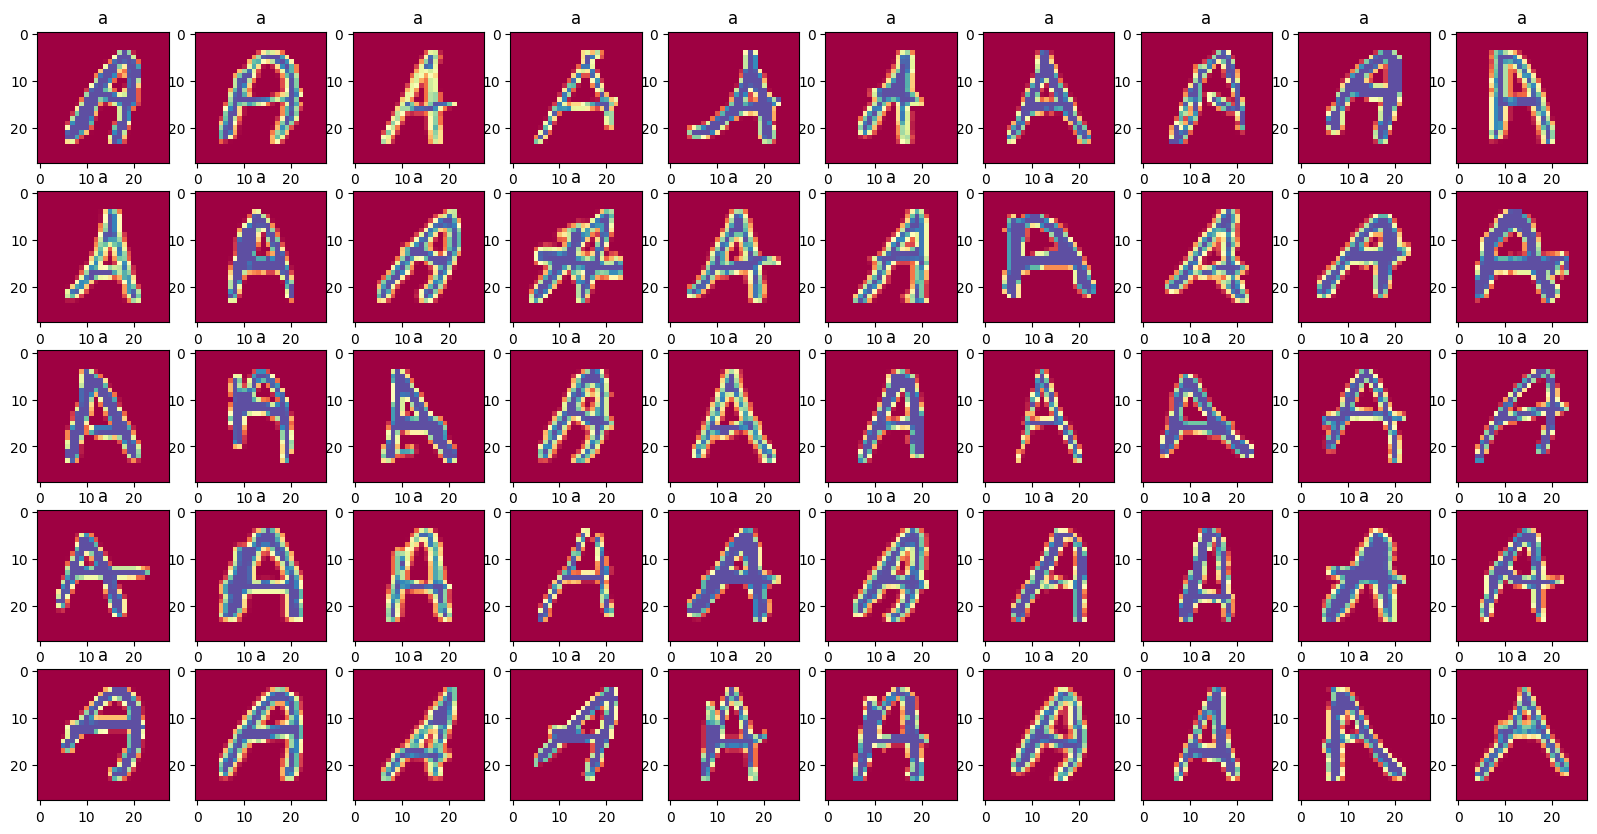

In [11]:
plt.figure(figsize=(20, 10))
for i in range(50):  
    plt.subplot(5,10,i+1)
    plt.title(chr(int(dataset['0'].iloc[i] )+ 97))
    plt.imshow(data.values[i].reshape(28,28), cmap=plt.get_cmap('Spectral'))
plt.show()

In [12]:
encoded = OneHotEncoder(sparse=False,handle_unknown='ignore')
labels=encoded.fit_transform(labels.values.reshape(-1,1))

c:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
train_data, test_data, train_label, test_label = train_test_split( data , labels , test_size=0.25, random_state=42,stratify=labels)

In [14]:
print("train data shape :" , train_data.shape)
print("test data shape :" , test_data.shape)

train data shape : (279337, 784)
test data shape : (93113, 784)


In [15]:
train_data= (train_data.astype('float32'))/255.0
test_data = (test_data.astype('float32'))/255.0

In [16]:
train_data = train_data.values.reshape(train_data.shape[0],28,28,1)
test_data =test_data.values.reshape(test_data.shape[0],28,28,1)

In [17]:
print("train data shape :" , train_data.shape)
print("test data shape :" , test_data.shape)

train data shape : (279337, 28, 28, 1)
test data shape : (93113, 28, 28, 1)


In [89]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu", input_shape =(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation ="relu"),
    tf.keras.layers.Dense(26, activation = "softmax")
])

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)         

In [91]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [92]:
augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
rotation_range=10,
zoom_range=0.05,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
fill_mode="nearest")

In [93]:
EPOCHS = 15
BS = 128

In [94]:
history = model.fit(
	augmentation.flow(train_data, train_label, batch_size=BS),
	validation_data=(test_data, test_label),
	steps_per_epoch=len(train_data) // BS,
	epochs=EPOCHS,
	verbose=1)

Epoch 1/15
2182/2182 [==============================] - 380s 173ms/step - loss: 0.4172 - accuracy: 0.8754 - val_loss: 0.1641 - val_accuracy: 0.9508
Epoch 2/15
2182/2182 [==============================] - 397s 182ms/step - loss: 0.1720 - accuracy: 0.9481 - val_loss: 0.0987 - val_accuracy: 0.9705
Epoch 3/15
2182/2182 [==============================] - 434s 199ms/step - loss: 0.1383 - accuracy: 0.9582 - val_loss: 0.0836 - val_accuracy: 0.9756
Epoch 4/15
2182/2182 [==============================] - 471s 216ms/step - loss: 0.1224 - accuracy: 0.9625 - val_loss: 0.0698 - val_accuracy: 0.9800
Epoch 5/15
2182/2182 [==============================] - 432s 198ms/step - loss: 0.1122 - accuracy: 0.9656 - val_loss: 0.0764 - val_accuracy: 0.9781
Epoch 6/15
2182/2182 [==============================] - 471s 216ms/step - loss: 0.1031 - accuracy: 0.9688 - val_loss: 0.0760 - val_accuracy: 0.9776
Epoch 7/15
2182/2182 [==============================] - 455s 209ms/step - loss: 0.0970 - accuracy: 0.9701 - val_

In [95]:
evaluation = model.evaluate(test_data, test_label, batch_size= 128, verbose=1)

728/728 [==============================] - 26s 36ms/step - loss: 0.0598 - accuracy: 0.9823


In [96]:
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

Summary: Loss over the test dataset: 0.06, Accuracy: 0.9823


In [98]:
#model.save('OCR_MODEL',save_format="h5")

c:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
temp_model_name = tf.keras.models.load_model("OCR_MODEL")

In [19]:
predictions = temp_model_name.predict(test_data, batch_size=128)
print(classification_report(test_label.argmax(axis=1), predictions.argmax(axis=1), target_names= label_char))

728/728 [==============================] - 26s 36ms/step
              precision    recall  f1-score   support

           a       0.99      0.98      0.99      3467
           b       0.95      0.98      0.97      2167
           c       0.98      0.97      0.98      5852
           d       0.95      0.95      0.95      2534
           e       0.99      0.98      0.99      2860
           f       0.91      0.99      0.95       291
           g       0.98      0.97      0.97      1440
           h       0.97      0.98      0.97      1804
           i       0.96      0.89      0.92       280
           j       0.97      0.96      0.97      2123
           k       0.98      0.98      0.98      1401
           l       0.99      0.95      0.97      2897
           m       0.99      0.99      0.99      3084
           n       0.99      0.98      0.99      4753
           o       0.98      0.99      0.99     14456
           p       0.99      0.99      0.99      4835
           q       0.96 

In [20]:
images = []
output = ""

for i in np.random.choice(np.arange(0, len(test_label)), size=(49,)):
  probs = temp_model_name.predict(test_data[np.newaxis, i])
  prediction = probs.argmax(axis=1)
  label = label_char[prediction[0]]
  output+=label
  image = (test_data[i] * 255).astype("uint8")
  color = (0, 255, 0)
  if prediction[0] != np.argmax(test_label[i]):
    color = (0, 0, 255)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
  images.append(image)
montage = build_montages(images, (97, 97), (7, 7))[0]
cv2.imshow("",montage)
cv2.waitKey(0)

1/1 [==============================] - 0s 31ms/step


-1